<center>
    <h1><b>DRY BEAN VARIETY DETECTION</b></h1>
    <img src="Images/dry beans mixed.jpg" alt="Dry Beans" width="800">
</center>

# Table of Contents
1. Introduction
2. Objective
3. Data Story
4. Data Loading and Preprocessing  
5. Model Building
6. Hyperparameter Tuning
7. Pipeline Building
8. Model Saving
9. Test With Unseen Data
10. Conclusion
11. Future Work
12. References



# 1.Introduction

Dry bean is one of the most cultivated edible legume crops in the world. Seggregate it based on its variety is essential for marketing as well as production. This project is based on a dataset, which was collected as part of a computer vision project published in Science Direct. As part of this study, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimension and 4 shape forms, were obtained from the grains. With this data, a machine learning model can be developed to seggregate the beans or to predict the variety of the beans.

# 2.Objective

The objective of this project is to implement a machine learning model to predict the dry bean variety. Supervised machine learning models are built to classify the dry bean varieties based on there physical appearance.

# 3. Data Story

The dataset, sourced from the UCI Machine Learning Repository, consists of 13,611 dry bean samples, each described by 17 features that capture their size, shape, texture, and geometry. The target variable is the bean variety, classified into seven types:
Seker, Barbunya, Bombay, Cali, Dermason, Horoz, Sira.  

The features are: 
- **Area**: The area of a bean zone and the number of pixels within its boundaries.  
- **Perimeter**: Bean circumference is defined as the length of its border.  
- **Major axis length**: The distance between the ends of the longest line that can be drawn from a bean.  
- **Minor axis length**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.  
- **Aspect ratio**: Defines the relationship between major and minor axis lengths.  
- **Eccentricity**: Eccentricity of the ellipse having the same moments as the region.  
- **Convex area**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.  
- **Equivalent diameter**: The diameter of a circle having the same area as a bean seed area.  
- **Extent**: The ratio of the pixels in the bounding box to the bean area.  
- **Solidity**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.  
- **Roundness**: Calculated with the formula (4π × Area) / (Perimeter²).  
- **Compactness**: Measures the roundness of an object using the ratio of equivalent diameter to major axis length.  
- **ShapeFactor1**  
- **ShapeFactor2**  
- **ShapeFactor3**  
- **ShapeFactor4**  

Data Set Link: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

# 4. Data Loading and Preprocessing

## 4.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

import joblib

## 4.2 Load Data Set

In [2]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')

## 4.3 Familiarise Data

### 4.3.1 Check the dimensions

In [3]:
df.shape

(13611, 17)

Number of rows= 13611  
Number of columns= 17

### 4.3.2 Check a few instances of the data set

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


These are the top 5 rows of the data set

### 4.3.3 Check the colomns and their data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Columns of different data types are present in this data set. Only Class column has object data type. Since class is the target variable here, all the feature columns are of numerical data type.

### 4.3.4 Statistical details of the data

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Since all the features are numerical columns, statistical details of all the features are present.

## 4.4 Find Missing Data

In [7]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

This data set does not contain null values

## 4.5 Find Duplicates

In [8]:
df.duplicated().sum()

np.int64(68)

There are 68 duplicates, which need to be deleted

In [9]:
df = df.drop_duplicates()

In [10]:
#Ensure that the duplicates are removed
df.duplicated().sum()

np.int64(0)

All the duplicates are removed

In [11]:
#Shape of the data set after removing duplicates
df.shape

(13543, 17)

## 4.6 Check Data Distribution

The distribution of the data across the dry bean varieties should be analysed.This ensures that the ML models are trained with balanced data.

### 4.6.1 Count Plot

Count plot is used to visualise the distribution of categorical variables. It is used to check the number of instances present for each variety in the data set

In [12]:
class_counts=df.Class.value_counts()
class_counts

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

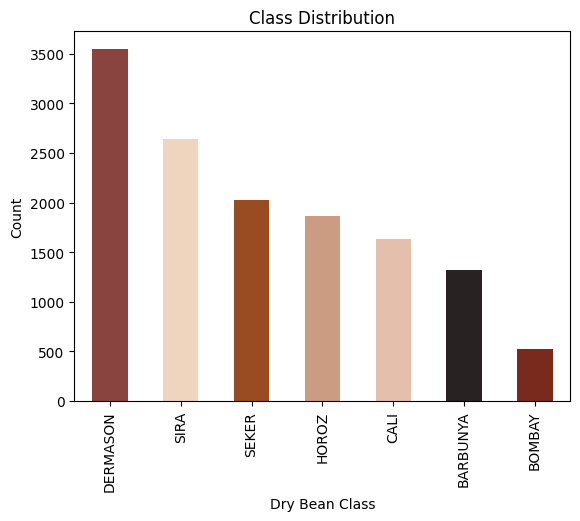

In [13]:
#Visualise the data distribution
class_counts.plot(kind='bar', title="Class Distribution", color=['#89443F', '#F0D5BE', '#994B22', '#CB9B82', '#E4C0AC', '#292223', '#792A1C'])
plt.xlabel("Dry Bean Class")
plt.ylabel("Count")
plt.show()

From the bar chart, it can be observed that the data is imbalanced. There are 3500+ instances of 'Dermason', which is quite high, when comapred to other varieties

### 4.6.2 KDE Plot

KDE plot helps to check the skewness, outliers, varience etc.  
**Skewness & Normality**  
Bell-shaped, symmetric KDE → The feature is normally distributed (good for most models).  
Right-skewed (long tail on right) → The feature has high positive skewness (may need log transformation).  
Left-skewed (long tail on left) → The feature has high negative skewness (may need transformation).   

**Outliers**  
KDE plots with sharp peaks & long tails may indicate the presence of outliers.  
Features with small bumps far away from the main peak suggest that some values are extreme.    
    
**Feature Scaling & Normalization**  
If features have high variance (wide KDE curves), they might need scaling (StandardScaler or MinMaxScaler).  
If a feature is skewed, applying log transformation or power transformation can make it more normally distributed.  
    
**Compare Feature Distributions**  
Some features may have bi-modal or multi-modal distributions, meaning they have more than one peak.  
This could indicate clusters in the data or the influence of different bean varieties.




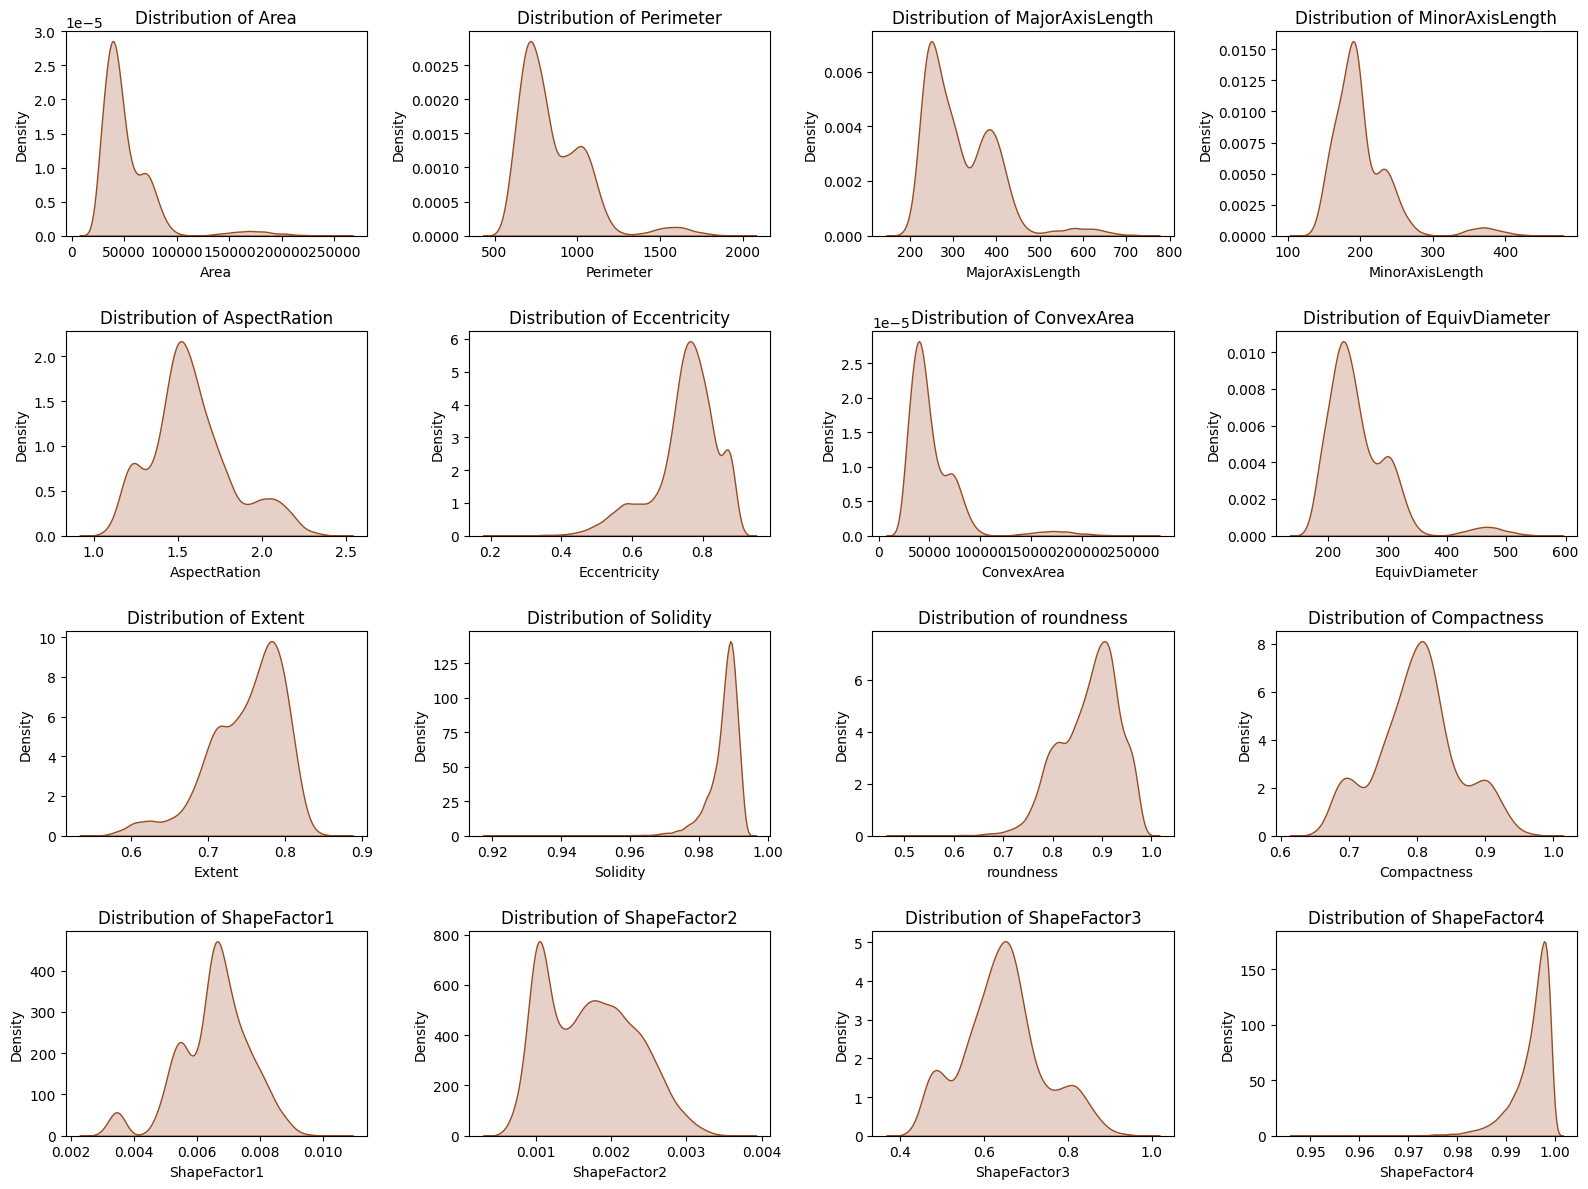

In [14]:
# Set figure size
fig, axes = plt.subplots(4, 4, figsize=(16, 12))  # 4 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a KDE plot
for i, col in enumerate(df.drop(columns=['Class']).columns):  
    sns.kdeplot(df[col], ax=axes[i], fill=True, color="#994B22")
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


**Skewness**  
Area and Convexarea have long right tail indicating high positive skewness  
Solidty and Shapefactor4 have long left tail indicating high negative skewness  

**Otliers**  
ShapeFactor2, Extent, Compatness are having wide area with small tail whereas most other features, especially shapeFactor4, Solidity are having high peaks with long tails indicationg the presence of outliers.  

## 4.7 Skweness

Skewness is a statistical measurement of how asymmetrical a distribution is around its mean. It indicates whether the data points in a distribution tend to lean towards the left or right of the mean

### 4.7.1 Box Plot

Box plots help to visualise the data distribution. A box plot includes a rectangular field that spans the interquartile range (IQR), with a line indicating the median. "Whiskers" enlarge from the box to the minimum and most values inside a specific range, often set at 1.5 times the IQR. Any records points beyond those whiskers are considered potential outliers

Find out the numerical columns from the data

In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

Plot box plot for each column

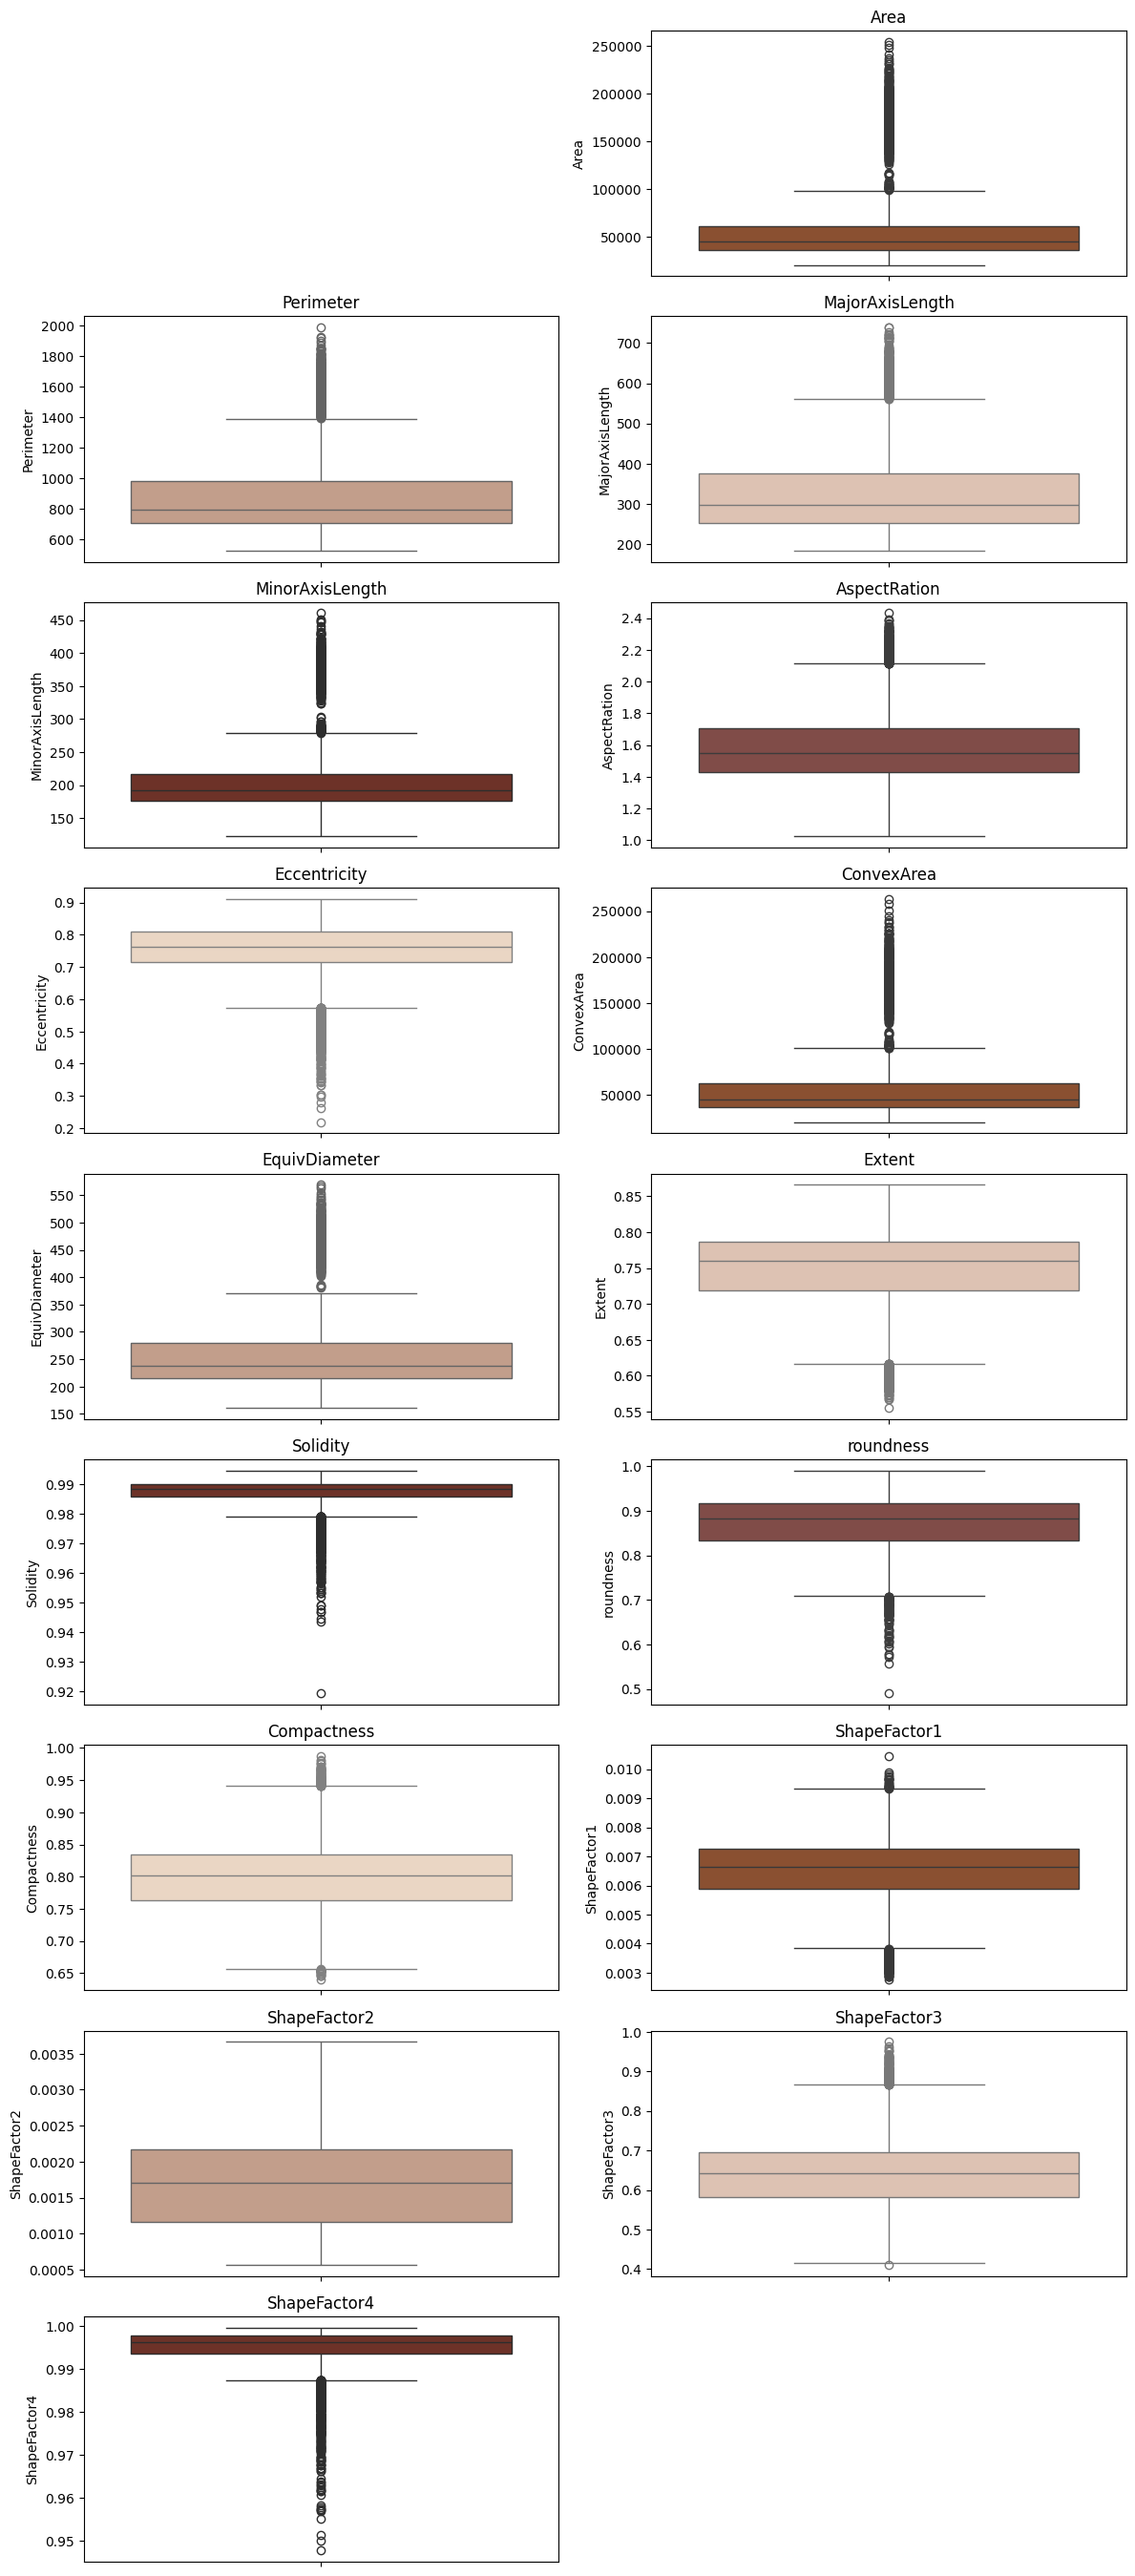

In [16]:
custom_palette = ["#89443F", "#F0D5BE", "#994B22", "#CB9B82", "#E4C0AC","#792A1C"]
plt.figure(figsize=(12, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols, 2):
    plt.subplot(len(numerical_cols), 2, i)
    color = custom_palette[i % len(custom_palette)]  # Cycle through colors
    sns.boxplot(data=df[col], color=color)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

### 4.7.2 Detecting Skewness

In [17]:
skew_values = df[numerical_cols].skew()
skew_values

Area               2.947136
Perimeter          1.628018
MajorAxisLength    1.365813
MinorAxisLength    2.232013
AspectRation       0.589045
Eccentricity      -1.064932
ConvexArea         2.936102
EquivDiameter      1.947303
Extent            -0.895655
Solidity          -2.546877
roundness         -0.648725
Compactness        0.036309
ShapeFactor1      -0.530427
ShapeFactor2       0.294332
ShapeFactor3       0.242767
ShapeFactor4      -2.760125
dtype: float64

**Interpreting the Skewness Values**:  
< -1 or > 1: Highly skewed  
-1 to -0.5 or 0.5 to 1: Moderately skewed  
-0.5 to 0.5: Approximate normal distribution  

Hence the folllowing columns are highly skewed:  
- Area  
- Perimeter  
- Major Axis Length
- Minor Axis Length
- Eccentricity
- Convex Area
- Equiv Diameter
- Solidity
- shape Factor4

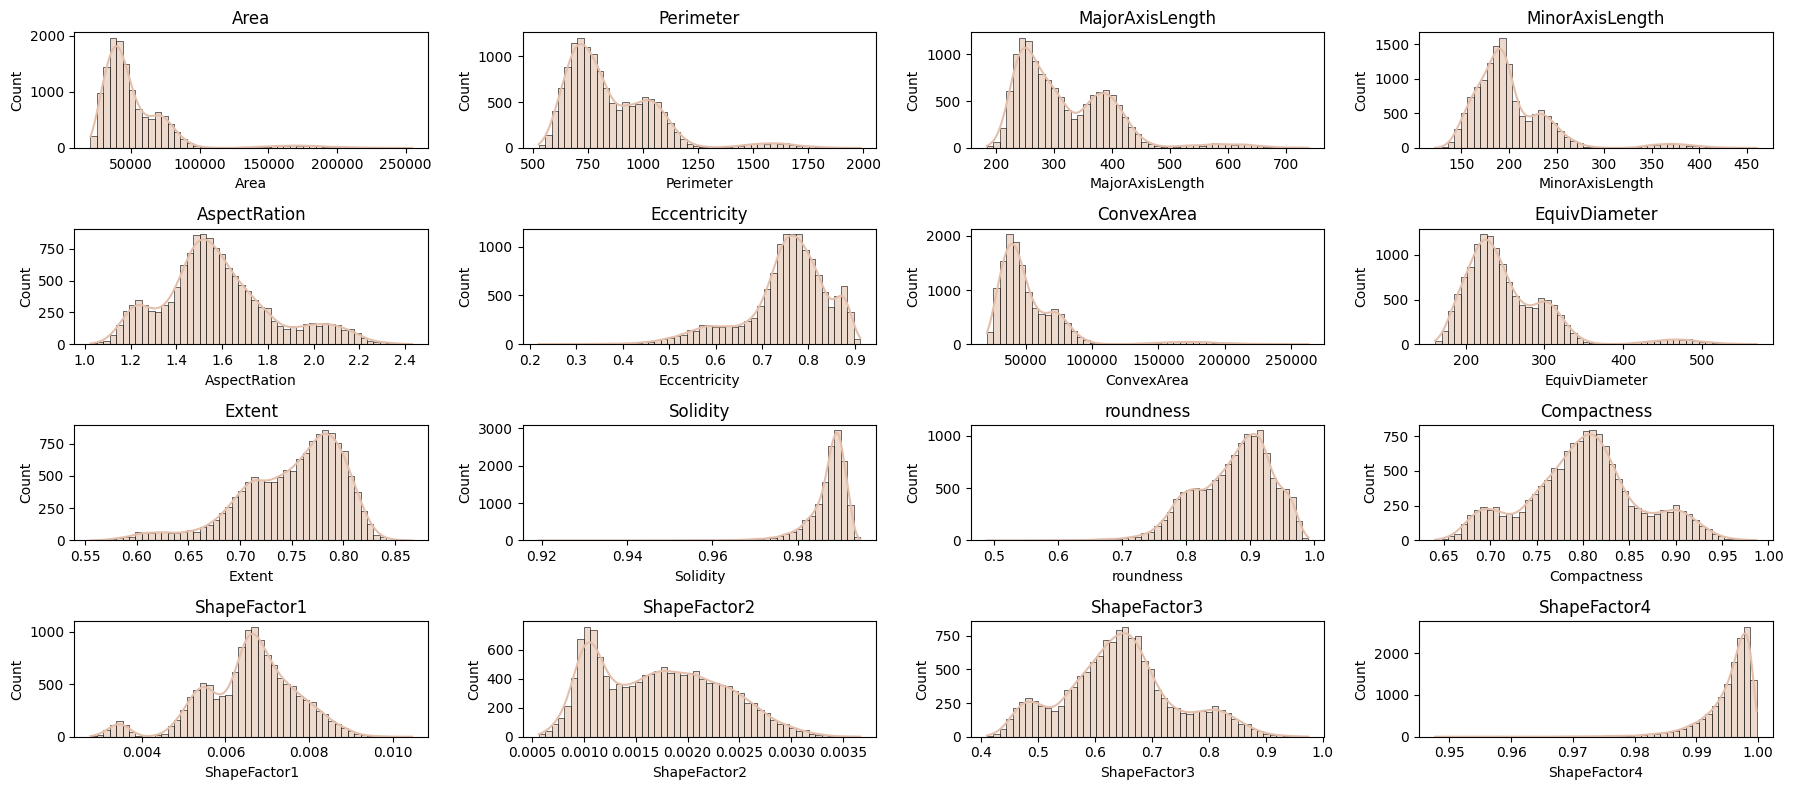

In [18]:
fig, axes = plt.subplots(4, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color="#E4C0AC", alpha=0.6)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Hence it is clear that the shape is almost normally distributed for aspect ratio, roundness, compactness, extent, ShapeFactor1, ShapeFactor2, ShapeFactor3

For columns with positive sqew, use log transformation and for columns with negative skew, use reflection&log transformation

### 4.7.3 Handling Skewness

In [19]:
#Handle Skewness
# Columns with high positive skew
pos_skew_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']
df[pos_skew_cols] = np.log1p(df[pos_skew_cols])

# Columns with high negative skew
neg_skew_cols = ['Eccentricity', 'Solidity', 'ShapeFactor4']
df[neg_skew_cols] = np.log1p(df[neg_skew_cols].max() - df[neg_skew_cols] + 1)

Check the skew value after transformation

In [20]:
new_numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
new_skew_values = df[new_numerical_cols].skew()
new_skew_values

Area               1.073117
Perimeter          0.848386
MajorAxisLength    0.640138
MinorAxisLength    1.307883
AspectRation       0.589045
Eccentricity       0.928282
ConvexArea         1.067860
EquivDiameter      1.075826
Extent            -0.895655
Solidity           2.518403
roundness         -0.648725
Compactness        0.036309
ShapeFactor1      -0.530427
ShapeFactor2       0.294332
ShapeFactor3       0.242767
ShapeFactor4       2.736005
dtype: float64

Skewness of ShapeFactor4 is still high. Hence applying Yeo-Johnson transformation

In [21]:
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation only on ShapeFactor4
df["ShapeFactor4"], lambda_val = yeojohnson(df["ShapeFactor4"])

# Print new skewness after transformation
print("Skewness after Yeo-Johnson transformation:")
print(df["ShapeFactor4"].skew())

Skewness after Yeo-Johnson transformation:
0.0


## 4.8 Outlier Detection

Outliers are information points that deviate significantly from the observations in a dataset

### 4.8.1 IQR Method

IQR (Interquartile Range) is the range between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile):  
IQR=Q3−Q1  
Q1 (25th percentile) → The value below which 25% of the data lies.  
Q3 (75th percentile) → The value below which 75% of the data lies.  
IQR represents the middle 50% of the data.  

This method flags any data points that lie 1.5 × IQR below Q1 or 1.5 × IQR above Q3 as outliers.

In [22]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply to all numerical columns
outlier_dict = {}
for col in new_numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_dict[col] = len(outliers)

# Print number of outliers per column
print("Number of outliers per column:")
print(outlier_dict)


Number of outliers per column:
{'Area': 506, 'Perimeter': 230, 'MajorAxisLength': 24, 'MinorAxisLength': 526, 'AspectRation': 485, 'Eccentricity': 726, 'ConvexArea': 502, 'EquivDiameter': 506, 'Extent': 271, 'Solidity': 771, 'roundness': 98, 'Compactness': 124, 'ShapeFactor1': 533, 'ShapeFactor2': 0, 'ShapeFactor3': 202, 'ShapeFactor4': 299}


### 4.8.2 Cap Outliers

In this method, the extreme values are not removed but are replaced by the upper or lower threshold values.This method is useful when outliers are not errors but extreme variations in the data.

In [23]:
# Function to cap outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Apply capping to all numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = cap_outliers(df, col)

print("Outliers capped successfully!")


Outliers capped successfully!


Verify that the outliers are removed

In [24]:
outlier_dict = {}
for col in new_numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_dict[col] = len(outliers)

# Print number of outliers per column
print("Number of outliers per column:")
print(outlier_dict)


Number of outliers per column:
{'Area': 0, 'Perimeter': 0, 'MajorAxisLength': 0, 'MinorAxisLength': 0, 'AspectRation': 0, 'Eccentricity': 0, 'ConvexArea': 0, 'EquivDiameter': 0, 'Extent': 0, 'Solidity': 0, 'roundness': 0, 'Compactness': 0, 'ShapeFactor1': 0, 'ShapeFactor2': 0, 'ShapeFactor3': 0, 'ShapeFactor4': 0}


### 4.8.3 Box Plot after transformation

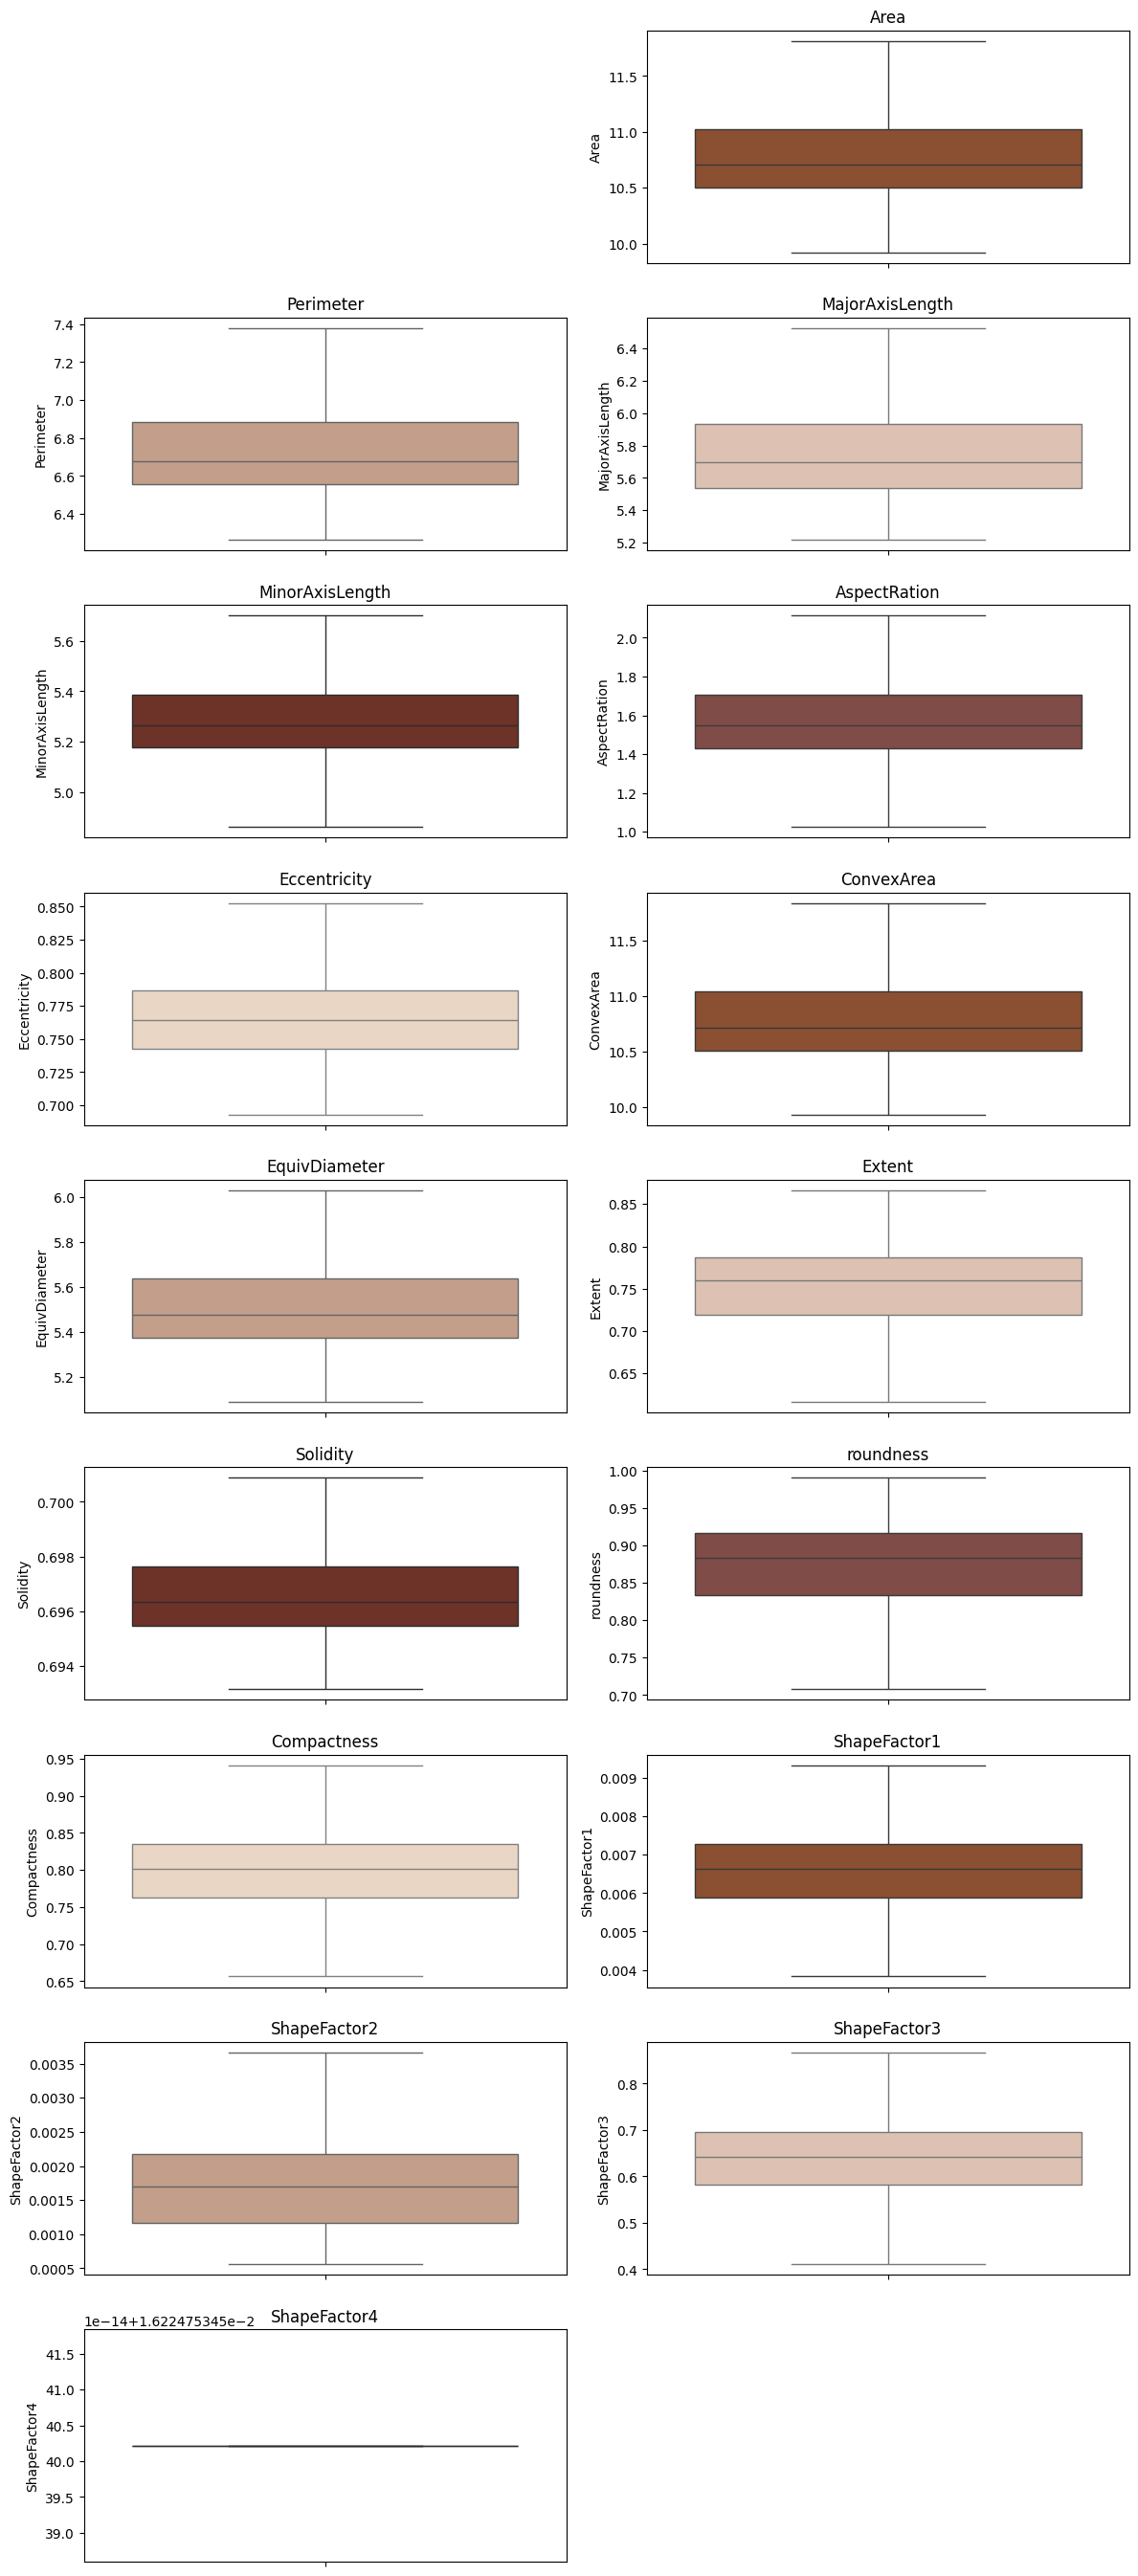

In [25]:
custom_palette = ["#89443F", "#F0D5BE", "#994B22", "#CB9B82", "#E4C0AC","#792A1C"]
plt.figure(figsize=(12, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols, 2):
    plt.subplot(len(numerical_cols), 2, i)
    color = custom_palette[i % len(custom_palette)]  # Cycle through colors
    sns.boxplot(data=df[col], color=color)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

Box plot indicates that the data does not contain outliers

## 4.9 Encoding

Encoding is the process of converting categorical data (text or labels) into a numerical format so that machine learning models can process it. 

In this data set, only the class column, which is the target column is a categorical data. Hence, only that needs to be encoded
Label Encoder is used so as to avaoid multiple column creation.

In [26]:
label_encoder = LabelEncoder()

# Encode the target column
df["Class"] = label_encoder.fit_transform(df["Class"])

# Print unique values after encoding
print("Encoded class values:", df["Class"].unique())

Encoded class values: [5 0 1 2 4 6 3]


There are only 7 varieties of dry beans. Hence values range from 0 to 6 after encoding.

## 4.10 Corelaton Analysis

Correlation analysis helps to understand the relationship between each columns and how they they are related to the targeted column. This helps to identify important columns

In [27]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation values
print(correlation_matrix)


                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.991102         0.958145         0.915520   
Perimeter        0.991102   1.000000         0.975405         0.873894   
MajorAxisLength  0.958145   0.975405         1.000000         0.765491   
MinorAxisLength  0.915520   0.873894         0.765491         1.000000   
AspectRation     0.385710   0.452651         0.617647        -0.001949   
Eccentricity    -0.391495  -0.456791        -0.619779        -0.008946   
ConvexArea       0.999933   0.991898         0.958687         0.914804   
EquivDiameter    1.000000   0.991102         0.958142         0.915522   
Extent          -0.010091  -0.052188        -0.108502         0.135778   
Solidity         0.299168   0.360868         0.338800         0.211904   
roundness       -0.537352  -0.623369        -0.669974        -0.269584   
Compactness     -0.398531  -0.465309        -0.630518        -0.009804   
ShapeFactor1    -0.907492  -0.863703  

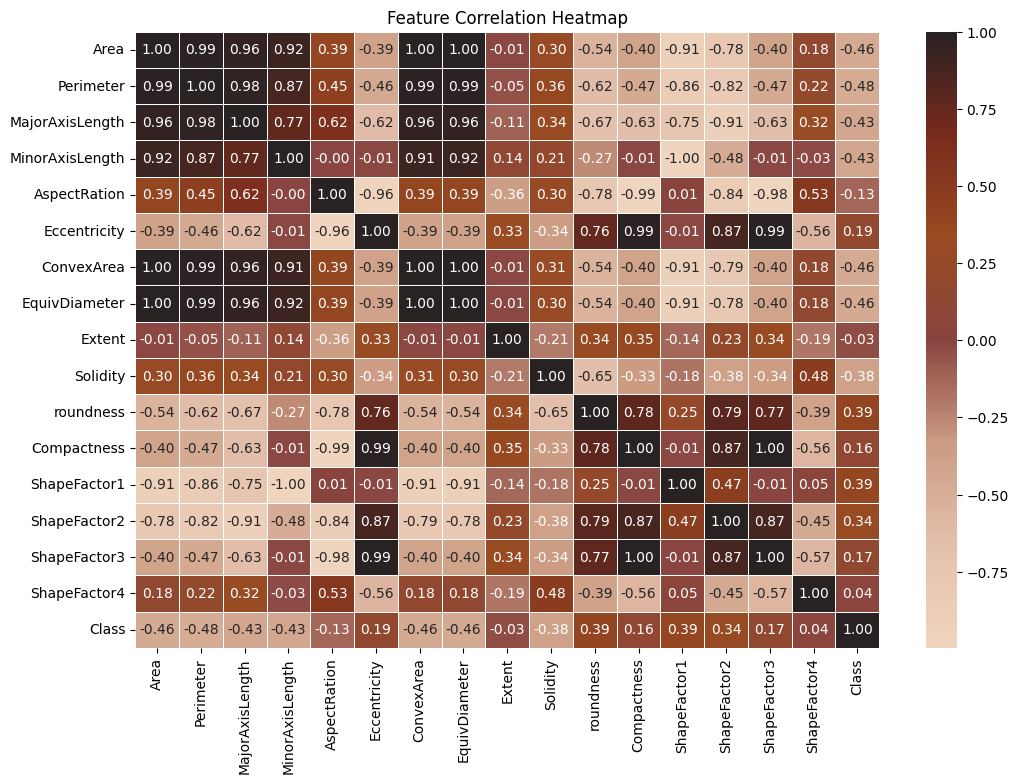

In [28]:
# Define custom color palette
custom_colors = ["#F0D5BE", "#E4C0AC", "#CB9B82", "#89443F", "#994B22", "#792A1C", "#292223"]

# Create a continuous colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
# Correlation with target variable
print(df.corr()['Class'].sort_values(ascending=False))

Class              1.000000
roundness          0.392113
ShapeFactor1       0.387931
ShapeFactor2       0.337656
Eccentricity       0.190036
ShapeFactor3       0.169328
Compactness        0.158822
ShapeFactor4       0.038592
Extent            -0.029762
AspectRation      -0.125453
Solidity          -0.380595
MajorAxisLength   -0.431979
MinorAxisLength   -0.433005
Area              -0.459538
EquivDiameter     -0.459705
ConvexArea        -0.462070
Perimeter         -0.480845
Name: Class, dtype: float64


Check Multicolinearity

In [30]:
# Set a threshold for high correlation
correlation_threshold = 0.75

# Find pairs with high correlation
high_corr_pairs = []
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) > correlation_threshold and idx != col:
            high_corr_pairs.append((idx, col, correlation_matrix.loc[idx, col]))


In [31]:
# Print highly correlated feature pairs
print("Highly Correlated Features (>|0.75|):")
for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]} : {pair[2]:.2f}")

Highly Correlated Features (>|0.75|):
Perimeter ↔ Area : 0.99
MajorAxisLength ↔ Area : 0.96
MinorAxisLength ↔ Area : 0.92
ConvexArea ↔ Area : 1.00
EquivDiameter ↔ Area : 1.00
ShapeFactor1 ↔ Area : -0.91
ShapeFactor2 ↔ Area : -0.78
Area ↔ Perimeter : 0.99
MajorAxisLength ↔ Perimeter : 0.98
MinorAxisLength ↔ Perimeter : 0.87
ConvexArea ↔ Perimeter : 0.99
EquivDiameter ↔ Perimeter : 0.99
ShapeFactor1 ↔ Perimeter : -0.86
ShapeFactor2 ↔ Perimeter : -0.82
Area ↔ MajorAxisLength : 0.96
Perimeter ↔ MajorAxisLength : 0.98
MinorAxisLength ↔ MajorAxisLength : 0.77
ConvexArea ↔ MajorAxisLength : 0.96
EquivDiameter ↔ MajorAxisLength : 0.96
ShapeFactor1 ↔ MajorAxisLength : -0.75
ShapeFactor2 ↔ MajorAxisLength : -0.91
Area ↔ MinorAxisLength : 0.92
Perimeter ↔ MinorAxisLength : 0.87
MajorAxisLength ↔ MinorAxisLength : 0.77
ConvexArea ↔ MinorAxisLength : 0.91
EquivDiameter ↔ MinorAxisLength : 0.92
ShapeFactor1 ↔ MinorAxisLength : -1.00
Eccentricity ↔ AspectRation : -0.96
roundness ↔ AspectRation : -0.7

## 4.11 Feature Selection

Feature selection is the process of choosing the most important features (columns) in a dataset to improve the performance of a machine learning model. It helps in:

- Reducing dimensionality (fewer features = faster models)
- Avoiding overfitting (eliminating noisy/unnecessary features)
- Improving model accuracy (removing irrelevant data)
- Enhancing interpretability (simpler models are easier to understand)

### 4.11.1 KBest Method

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define number of features to select (choose K)
K = 8
X = df.drop(columns=['Class'])
y = df['Class']

selector = SelectKBest(score_func=f_classif, k=K)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features using K-Best:", list(selected_features))


Selected Features using K-Best: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor1', 'ShapeFactor2']


In [33]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

### 4.11.2 Shape of the data

In [34]:
df[selected_features].shape

(13543, 8)

## 4.12 Data Splitting

Split the data into training and testing sets. Test size is choosen as 0.2. Hence 80% of the data is used for training and the rest for validation

In [35]:
# Splitting the data
# Use only selected features
#X = df.drop(columns=['Class','AspectRation', 'Eccentricity','Extent',
#       'Solidity', 'roundness', 'Compactness','ShapeFactor3', 'ShapeFactor4'])
X=df[selected_features]
y = df['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (10834, 8)
Testing set size: (2709, 8)


In [36]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,ShapeFactor1,ShapeFactor2
5963,10.793167,6.774796,5.866101,5.181520,10.806956,5.521364,0.007227,0.001118
13060,10.530655,6.590561,5.618733,5.165251,10.541043,5.390666,0.007332,0.001810
10327,10.145728,6.402706,5.441998,4.960333,10.158711,5.199163,0.009023,0.002097
591,10.516455,6.553695,5.471958,5.297201,10.528195,5.383598,0.006418,0.002776
10931,10.256325,6.474949,5.407544,5.102539,10.276602,5.254167,0.007803,0.002598


## 4.13 Scaling

Scaling is the process of transforming numerical features so that they have a similar range. This helps machine learning models perform better by ensuring that no single feature dominates due to its larger values.

In [37]:
# Initialize Standard Scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

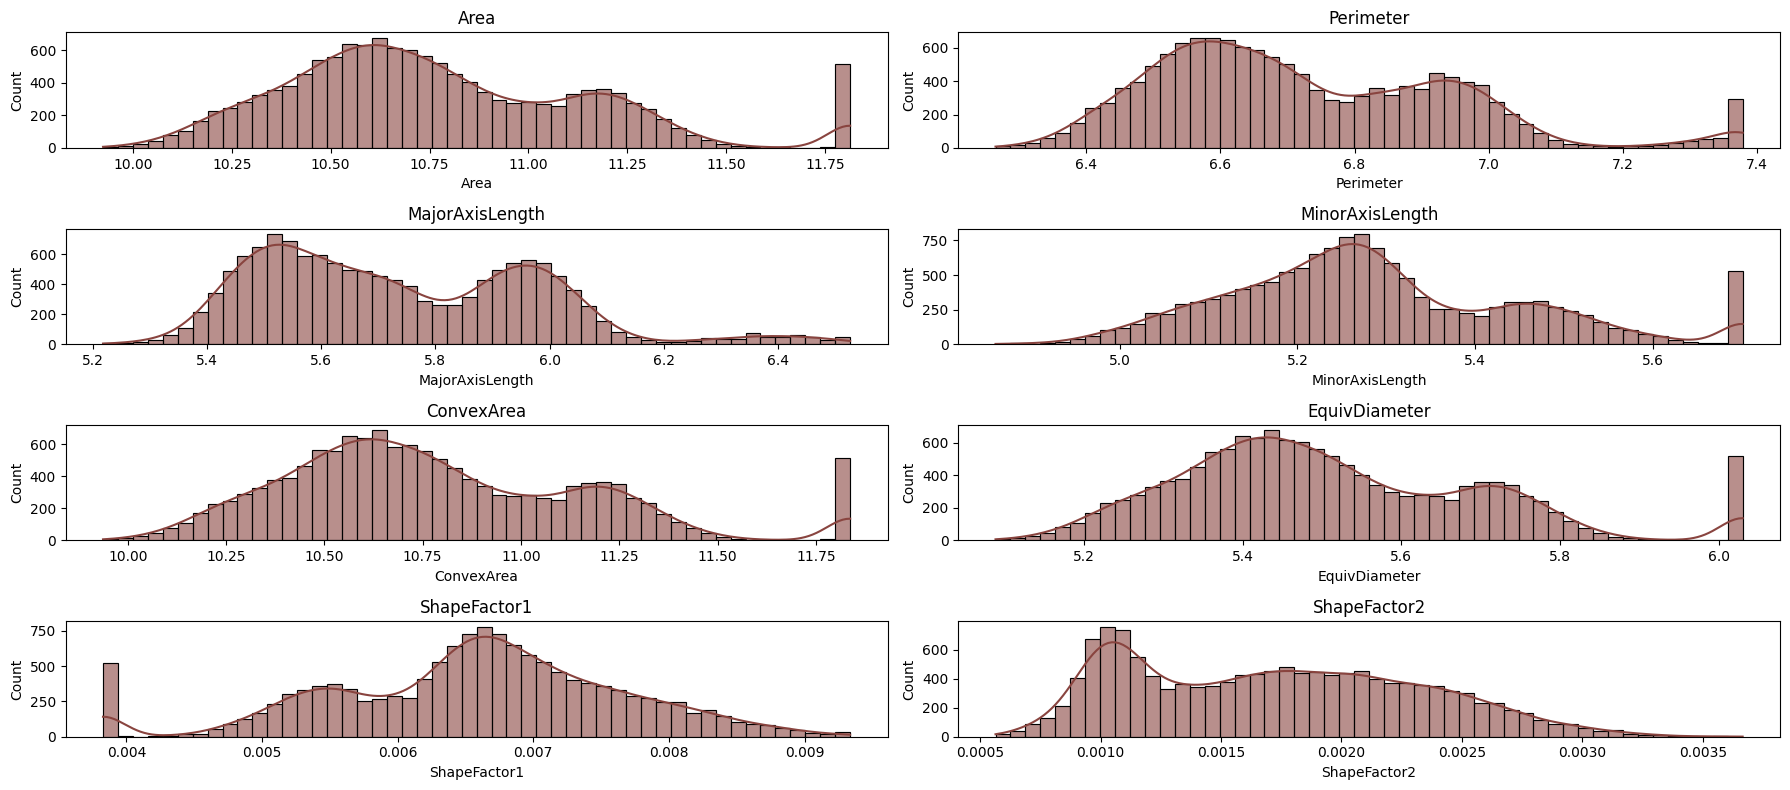

In [38]:
fig, axes = plt.subplots(4, 2, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(X):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color="#89443F", alpha=0.6)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


## 4.14 Imbalance Correction

Since there was an imbalance in data, apply SMOTE to perform oversampling and balance the distribution

In [39]:

# Applying SMOTE
print("Original Class Distribution:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled Class Distribution:", pd.Series(y_train).value_counts())

Original Class Distribution: Class
3    2839
6    2102
5    1613
4    1484
2    1325
0    1063
1     408
Name: count, dtype: int64
Resampled Class Distribution: Class
4    2839
3    2839
5    2839
0    2839
2    2839
6    2839
1    2839
Name: count, dtype: int64


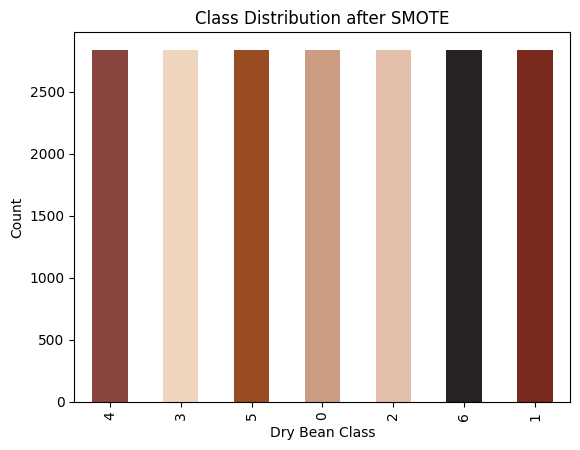

In [40]:
#Visualise the data distribution
pd.Series(y_train).value_counts().plot(kind='bar', title="Class Distribution after SMOTE", color=['#89443F', '#F0D5BE', '#994B22', '#CB9B82', '#E4C0AC', '#292223', '#792A1C'])
plt.xlabel("Dry Bean Class")
plt.ylabel("Count")
plt.show()

# 5. Model Building

This data set contains details about the physical appearances of different dry bean varities. Since the labelled data is available, supervised learning can be used for training differnt machine language algorithms. The aim of this project is to classify dry beans. Hence it is implied that this is a classification problem. There are seven varities of dry beans, within the scope of this data set. So, this requires a **Multi Class Classification Model**.

Different Classification models are built and trained with the data. Below are the models considered:
- Logistic Regression
- Ridge Classifier
- Random forest
- Gradient Boosting
- K-Nearest Neighbors
- Support Vector Method

## 5.1 Models Used

**Logistic Regression**

- A statistical model used for binary and multi-class classification.
- Uses the sigmoid function to estimate probabilities and make decisions.
- Works well when features have a linear relationship with the target.

**Ridge Classifier**
- A variation of logistic regression that uses L2 regularization to prevent overfitting.
- Used  when there is multicollinearity (high correlation between features).
- Penalizes large coefficients to improve generalization.

**Random Forest**
- An ensemble model that combines multiple decision trees.
- Uses bagging (Bootstrap Aggregating) to reduce overfitting.
- Provides feature importance scores, making it interpretable.

**Gradient Boosting Classifier**
- A boosting technique where trees are built sequentially, learning from previous mistakes.
- Models errors using gradient descent, improving weak learners.
- More accurate than Random Forest but takes longer to train.

**K-Nearest Neighbors (KNN)**
- A distance-based algorithm that classifies based on the K closest data points.
- No training phase, but slow for large datasets since it computes distances at runtime.
- Performance depends on choosing the right K value.

**Support Vector Machine (SVM)**
- Finds an optimal hyperplane that separates classes with the maximum margin.
- Can use kernel tricks (like RBF, polynomial) to handle non-linear data.
- Computationally expensive but great for high-dimensional datasets.

## 5.2 Model Training

The training data is given to train these machine learning models. Training is followed by testing with the testing set to predict the class

In [41]:
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    print(f"Trained {name} model")

Trained Logistic Regression model
Trained Ridge Classifier model
Trained Random Forest model
Trained Gradient Boosting model
Trained K-Nearest Neighbors model
Trained SVM model


## 5.3 Evaluating Models

Performance of Classifications are evaluated using different methods like:
- Confusion Metrix
- Accuracy
- Precision
- Recall
- F1 Score
- ROC Curve  
However ROC curves are not suitable for multiclass classification.

### 5.3.1 Confusion Matrix

Confusion matrix is a table that shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

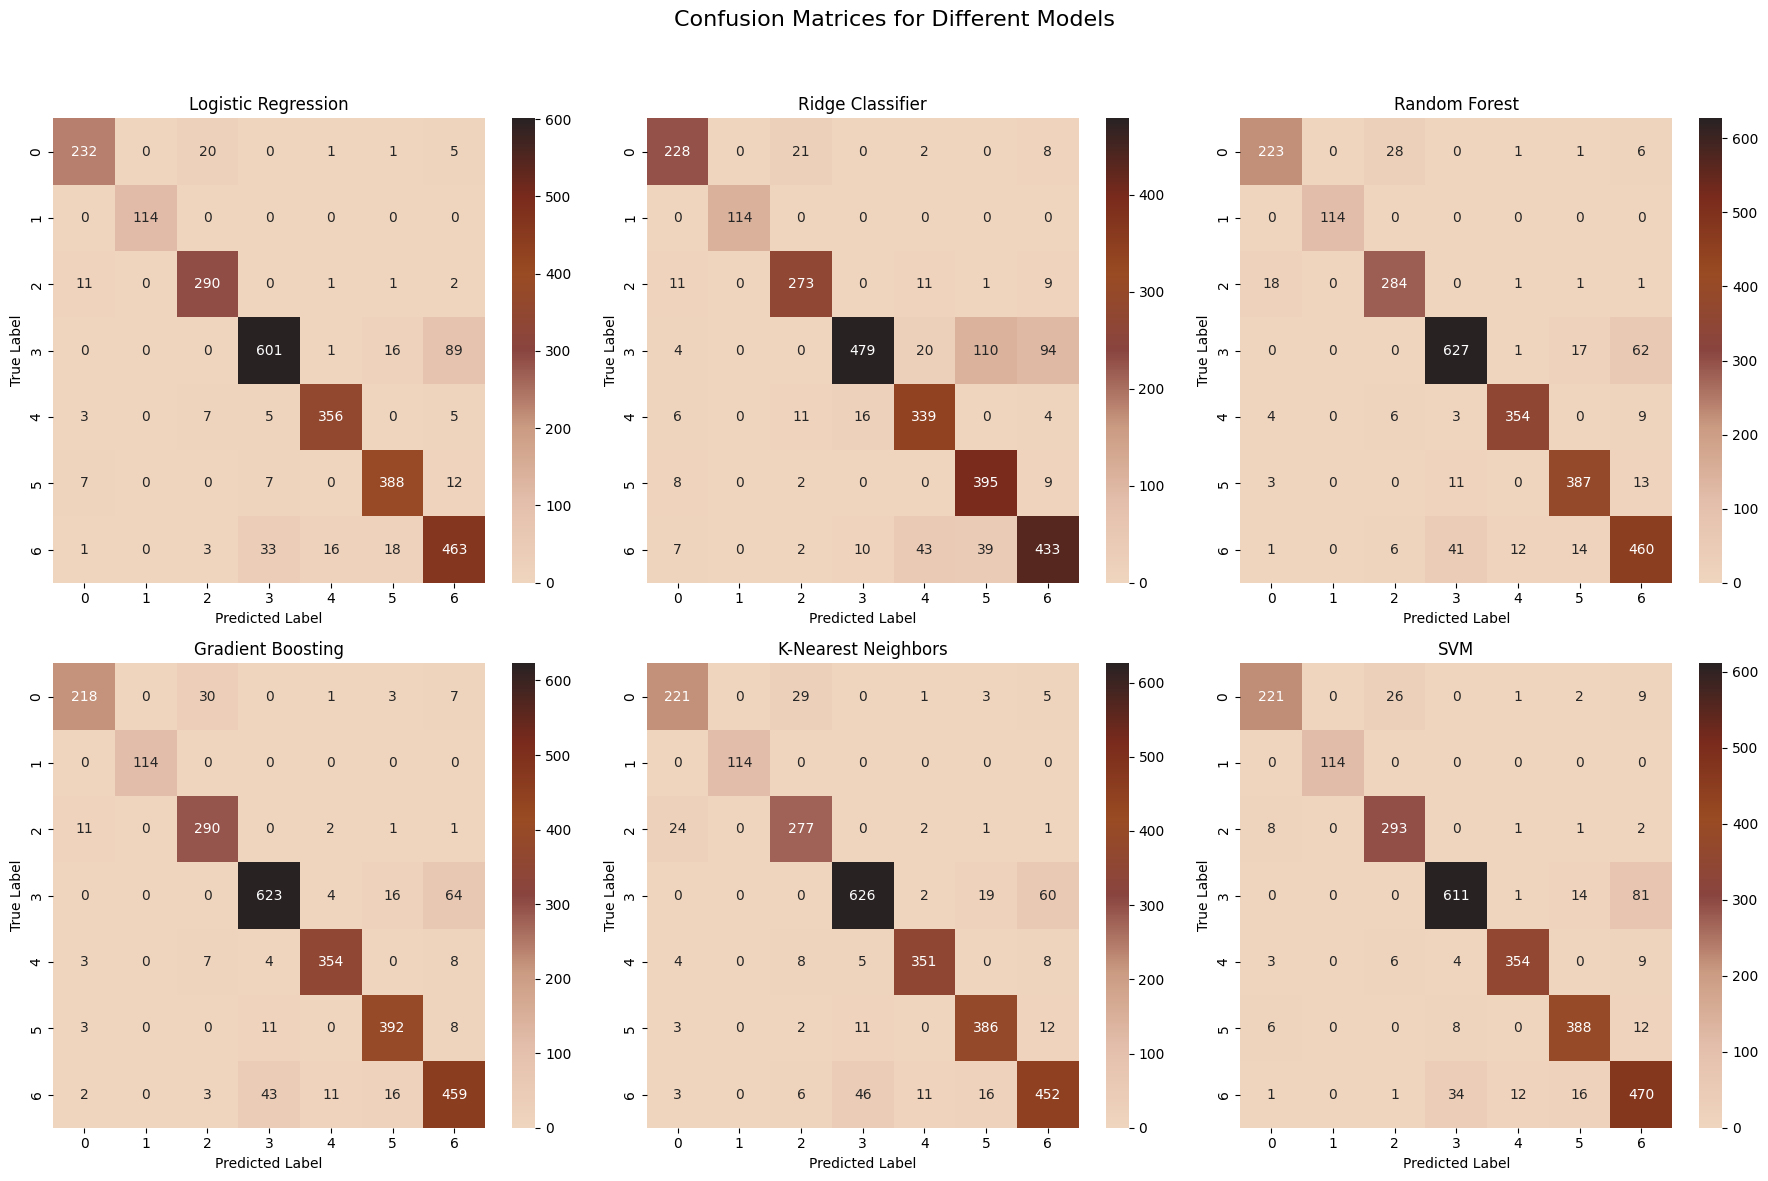

In [42]:
# Set figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  
fig.suptitle("Confusion Matrices for Different Models", fontsize=16)

# Iterate over models and plot confusion matrices
for ax, (name, model) in zip(axes.flatten(), models.items()):
    # Predict using the model
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap, xticklabels=model.classes_, yticklabels=model.classes_, ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


From the confusion matrix, it can be seen that all the models are performing good. For all the models, the false positive values are higher for the bean variety 6. Bean variety 3 is having the heighest true positive predictions, among all the varities, in all the models.

### 5.3.2 Classification Report

Classification report is used to find the accuracy, precision, recall and F1 score of each model.
Accuracy= (TP+TN)/(FP+FN+TP+TN)  
Precision=TP/(TP+FP)  
Recall= TP/(TP+FN)  
F1 Scor= 2*(Precision*Recall)/(Precision+Recall)  


In [43]:
results = {}
for name, model in models.items():  
    # Compute metrics
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
   # print(f"Model {model}:{report} \n")
    
    # Store results
    results[name] = {
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.902178   0.904305  0.902178  0.902445
Ridge Classifier     0.834625   0.849046  0.834625  0.833177
Random Forest        0.904024   0.904865  0.904024  0.904183
Gradient Boosting    0.904393   0.905178  0.904393  0.904311
K-Nearest Neighbors  0.895903   0.896414  0.895903  0.895991
SVM                  0.904762   0.907302  0.904762  0.905123


Since this is multiclass classification, F1-Score will be the best measure to evaluate performance. **Comparing the F1 score of these models, SVM performs better.**

## 5.4 Check Overfitting

In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that can’t make accurate predictions or conclusions from any data other than the training data. 

In [44]:
for model_name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{model_name}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

Logistic Regression: Train Accuracy = 0.9283, Test Accuracy = 0.9022
Ridge Classifier: Train Accuracy = 0.8787, Test Accuracy = 0.8346
Random Forest: Train Accuracy = 1.0000, Test Accuracy = 0.9040
Gradient Boosting: Train Accuracy = 0.9557, Test Accuracy = 0.9044
K-Nearest Neighbors: Train Accuracy = 0.9591, Test Accuracy = 0.8959
SVM: Train Accuracy = 0.9252, Test Accuracy = 0.9048


The results indicates that overfitting is present. Especially in random forest, gradient boosting, and KNN models.

### 5.4.1 Handle Overfitting

Overfitting can be controlled by reducing the learning depth, tree depth etc. The following are implemented.
- Logistic Regression: Use Lasso method for regularisation  
- Ridge Classifier: Increase regularisation strength (alpha)  
- Random Forest: Reduce max_depth, increase min_samples_split, decrease n_estimators  
- Gradient Boosting: Reduce learning rate, max_depth, n_estimator  
- KNN: Increase n_neighbors  
- SVM: Reduce C and gamma  


In [45]:
models = {
    "Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', C=0.1),
    "Ridge Classifier": RidgeClassifier(alpha=2.0),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_split=20, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=50, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "SVM": SVC(C=0.5, kernel='rbf', gamma=0.01, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    print(f"Trained {name} model")

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results[name] = {
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:\n")
print(results_df)

Trained Logistic Regression model
Trained Ridge Classifier model
Trained Random Forest model
Trained Gradient Boosting model
Trained K-Nearest Neighbors model
Trained SVM model

Model Performance Comparison:

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.894426   0.900022  0.894426  0.895013
Ridge Classifier     0.835733   0.851097  0.835733  0.834390
Random Forest        0.892949   0.894783  0.892949  0.893444
Gradient Boosting    0.888889   0.890011  0.888889  0.889058
K-Nearest Neighbors  0.899225   0.900363  0.899225  0.899437
SVM                  0.889258   0.893430  0.889258  0.889255


In [46]:
for model_name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{model_name}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

Logistic Regression: Train Accuracy = 0.9212, Test Accuracy = 0.8944
Ridge Classifier: Train Accuracy = 0.8791, Test Accuracy = 0.8357
Random Forest: Train Accuracy = 0.9233, Test Accuracy = 0.8929
Gradient Boosting: Train Accuracy = 0.9218, Test Accuracy = 0.8889
K-Nearest Neighbors: Train Accuracy = 0.9458, Test Accuracy = 0.8992
SVM: Train Accuracy = 0.9030, Test Accuracy = 0.8893


# 6. Hyperparameter Tuning

In [47]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
}

# Initialize SVM model
svm = SVC()

# GridSearchCV for hyperparameter tuning (5-fold cross-validation)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy Score: {grid_search.best_score_}")

# Train final model with best parameters
best_svm = grid_search.best_estimator_


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy Score: 0.9448003595699088


# 7. Pipeline Building

In [48]:

# Use best hyperparameters from GridSearchCV
best_svm = SVC(C=100, gamma=1, kernel='rbf', random_state=42)

# Creating a pipeline with scaler, SMOTE, and best model
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),  
    ('classifier', best_svm) 
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on test data
accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9188


# 8. Model Saving

In [49]:
joblib.dump(pipeline, 'svm_smote_pipeline.joblib')

['svm_smote_pipeline.joblib']

# 9. Test With Unseen Data

In [50]:
df_unseen=pd.read_excel('UnseenData.xlsx')
#df_unseen=pd.read_excel('Dry_Bean_Dataset.xlsx')


In [51]:
df_unseen.shape

(73, 17)

In [52]:
df_unseen.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,43145,799.426,273.402945,201.266886,1.358410,0.676813,43812,234.379863,0.766123,0.984776,0.848367,0.857269,0.006337,0.002111,0.734910,0.998309,BARBUNYA
1,132879,1373.510,499.646493,339.906840,1.469951,0.732939,134325,411.338705,0.789361,0.989310,0.885187,0.823259,0.003760,0.001065,0.677756,0.996269,BOMBAY
2,52448,882.474,336.959421,199.005113,1.693220,0.806971,53082,258.416075,0.789190,0.988056,0.846321,0.766906,0.006425,0.001371,0.588144,0.995858,CALI
3,21111,534.701,185.381921,146.032258,1.269459,0.616011,21462,163.910426,0.746357,0.983180,0.930930,0.884177,0.008785,0.003312,0.781769,0.992423,DERMASON
4,34232,744.329,296.973154,148.167484,2.004307,0.866645,34936,208.771493,0.604603,0.979849,0.776448,0.702998,0.008675,0.001307,0.494206,0.990541,HOROZ


In [53]:
class_counts=df_unseen.Class.value_counts()
class_counts


Class
DERMASON    14
BOMBAY      12
HOROZ       11
SEKER       11
CALI         9
BARBUNYA     8
SIRA         8
Name: count, dtype: int64

In [54]:
label_encoder = LabelEncoder()

# Encode the target column
df_unseen["Class"] = label_encoder.fit_transform(df_unseen["Class"])

# Print unique values after encoding
print("Encoded class values:", df_unseen["Class"].unique())

Encoded class values: [0 1 2 3 4 5 6]


In [55]:
# Splitting the data
# Use only selected features
X1 = df_unseen.drop(columns=['Class','AspectRation', 'Eccentricity','Extent',
       'Solidity', 'roundness', 'Compactness','ShapeFactor3', 'ShapeFactor4'])
y1 = df_unseen['Class']  # Target variable

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

# Print shapes
print("Training set size:", X_train1.shape)
print("Testing set size:", X_test1.shape)



Training set size: (65, 8)
Testing set size: (8, 8)


In [56]:
from collections import Counter
print(Counter(y_train1))  # Shows class distribution


Counter({3: 13, 1: 11, 5: 11, 4: 10, 6: 7, 2: 7, 0: 6})


In [57]:
#Use Pipeline
# Train the pipeline
pipeline.fit(X_train1, y_train1)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=100, gamma=1, random_state=42))])

In [58]:
y_pred1=pipeline.predict(X_test1)
y_pred1

array([4, 6, 3, 0, 1, 2, 0, 2])

In [59]:
# Print actual vs predicted values
print("Actual y values:", y_test1.tolist())  # Convert to list for better readability
print("Predicted y values:", y_pred1.tolist())

# Calculate and print accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print(f"\nAccuracy on Unseen Data: {accuracy:.4f}")

# Show classification report
print("\nClassification Report:\n", classification_report(y_test1, y_pred1))

Actual y values: [4, 6, 3, 0, 1, 2, 0, 2]
Predicted y values: [4, 6, 3, 0, 1, 2, 0, 2]

Accuracy on Unseen Data: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# 10. Conclusion

<center>
    <img src="dry beans-sorted.jpg" alt="Dry Beans" width="800">
</center>

Multiple model has been trained to classify the dry beans based on existing data. All the models demonstrate considerable accuracy and precision. Comparing the F1 score and taking into account the accuracy against the training data, SVM has been choosen as the best model. A pipeline is built for future use. The pipeline includes scaling, imbalance correction and SVM model building. This can be used to classify dy beans, from any data set.

# 11. Future Work

Future improvements could include:

Deep learning techniques can be used to get more accurate results.  
Real-time deployment of the model in agricultural settings.  
Integration with IoT devices to classify beans on the go.  

# 12. References

https://www.sciencedirect.com/science/article/pii/S2772375523000709  
https://medium.com/@sjatienzo/dry-beans-classification-with-supervised-learning-4546d14e3841  
https://www.geeksforgeeks.org
https://aws.amazon.com
https://stackoverflow.com